In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the file path
file_path = "C:\\Users\\chait\\Downloads\\loan\\loan.csv"

# Read the Excel file into a DataFrame
df = pd.read_csv(file_path)

# Drop unnecessary columns by name
columns_to_drop = ['tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m','open_il_24m','mths_since_rcnt_il',
                   'total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi',
                   'total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy','bc_util',
                   'mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc',
                   'mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq',
                   'num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl',
                   'num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m','num_tl_30dpd',
                   'num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim',
                   'total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit','mths_since_last_major_derog',
                   'annual_inc_joint','dti_joint','verification_status_joint','mths_since_last_record','next_pymnt_d',
                   'tax_liens','chargeoff_within_12_mths','collections_12_mths_ex_med','pymnt_plan','initial_list_status',
                   'application_type','acc_now_delinq','delinq_amnt','policy_code']
df = df.drop(columns=columns_to_drop)

# Impute null values in few columns
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].fillna(0)
df['emp_length'] = df['emp_length'].fillna(0)
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)
df['emp_title'] = df['emp_title'].fillna('UNDISCLOSED_EMPLOYER')
df['desc'] = df['desc'].fillna('NO_DESCRIPTION')
df['title'] = df['title'].fillna('Other Loan')
# Use the replace() method to replace specific values in the 'title' column as they all mean the same
replace_values = ['Debt Consolidation', 'Debt Consolidation Loan', 'Consolidation', 'debt consolidation', 'Debt consolidation']
new_name = 'Debt Consolidation Loan'
df['title'] = df['title'].replace(replace_values, new_name)

# Drop few rows which have null values on few columns.
df = df.dropna(subset=['revol_util','last_credit_pull_d','last_pymnt_d'])

# Replace values in few columns and change type from object to int/float64
df['term'] = df['term'].str.replace(' months', '')
df['term'] = df['term'].astype('int64')
df['int_rate'] = df['int_rate'].str.replace('%', '')
df['int_rate'] = df['int_rate'].astype('float64')
df['revol_util'] = df['revol_util'].str.replace('%', '')
df['revol_util'] = df['revol_util'].astype('float64')
df['emp_length'] = df['emp_length'].str.replace('10\+ years', '10')
df['emp_length'] = df['emp_length'].str.replace(' years', '')
df['emp_length'] = df['emp_length'].str.replace(' year', '')
df['emp_length'] = df['emp_length'].str.replace('< 1', '0.5')
df['emp_length'] = df['emp_length'].astype('float64')
df = df.rename(columns={'term': 'term_in_months', 'revol_util': 'revol_util_in_percent'})

value_counts = df['int_rate'].value_counts()
# Print the result
print(value_counts)

df.info()

C:\Users\chait\AppData\Local\Temp\ipykernel_12520\1695168487.py:9: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
C:\Users\chait\AppData\Local\Temp\ipykernel_12520\1695168487.py:48: FutureWarning: The default value of regex will change from True to False in a future version.
  df['emp_length'] = df['emp_length'].str.replace('10\+ years', '10')


10.99    956
13.49    824
11.49    821
7.51     786
7.88     725
        ... 
16.33      1
16.15      1
16.01      1
10.64      1
17.44      1
Name: int_rate, Length: 371, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 39598 entries, 0 to 39716
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39598 non-null  int64  
 1   member_id                39598 non-null  int64  
 2   loan_amnt                39598 non-null  int64  
 3   funded_amnt              39598 non-null  int64  
 4   funded_amnt_inv          39598 non-null  float64
 5   term_in_months           39598 non-null  int64  
 6   int_rate                 39598 non-null  float64
 7   installment              39598 non-null  float64
 8   grade                    39598 non-null  object 
 9   sub_grade                39598 non-null  object 
 10  emp_title                39598 non-null  object 
 11 

In [30]:
#Q1 = df['loan_amnt'].quantile(0.25)
#Q3 = df['loan_amnt'].quantile(0.75)

# Calculate the IQR (Interquartile Range)
#IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

# Remove rows with 'loan_amnt' values outside the upper and lower bounds
#df = df[(df['loan_amnt'] >= lower_bound) & (df['loan_amnt'] <= upper_bound)]

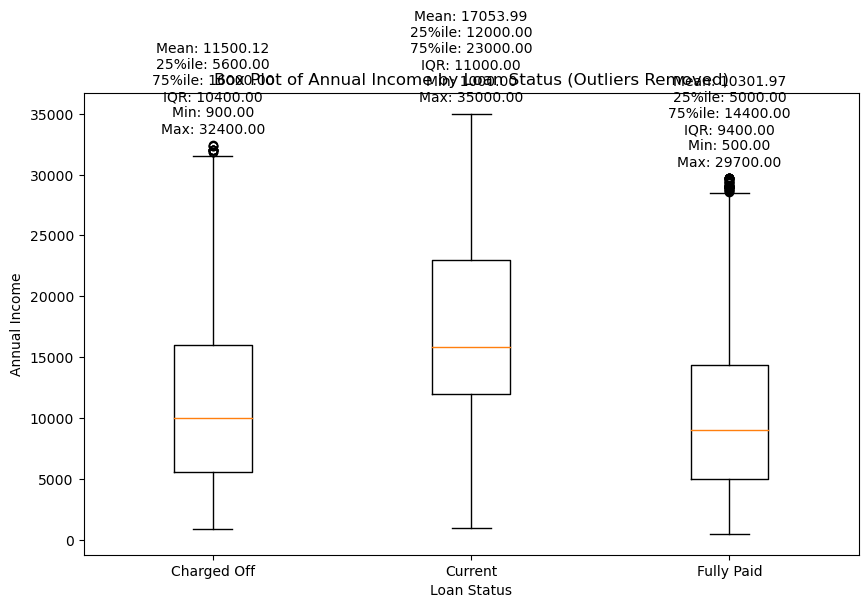

In [31]:
def remove_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data >= lower_bound) & (data <= upper_bound)]

# Group the data by 'loan_status'
grouped = df.groupby('loan_status')

# Create a list to store the cleaned 'annual_inc' data for each group
cleaned_data_to_plot = []

# Create a list to store the statistical values for each group
statistical_values = []

# Iterate through each group, remove outliers, and append cleaned data and statistical values
for name, group in grouped:
    cleaned_data = remove_outliers(group['loan_amnt'])
    cleaned_data_to_plot.append(cleaned_data)
    
    mean_value = cleaned_data.mean()
    Q1 = cleaned_data.quantile(0.25)
    Q3 = cleaned_data.quantile(0.75)
    IQR = Q3 - Q1
    min_value = cleaned_data.min()
    max_value = cleaned_data.max()
    
    stats_text = f'Mean: {mean_value:.2f}\n25%ile: {Q1:.2f}\n75%ile: {Q3:.2f}\nIQR: {IQR:.2f}\nMin: {min_value:.2f}\nMax: {max_value:.2f}'
    statistical_values.append(stats_text)


# Create a box plot for the cleaned data
plt.figure(figsize=(10, 6))
box_plot = plt.boxplot(cleaned_data_to_plot, labels=grouped.groups.keys())
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.title('Box Plot of Annual Income by Loan Status (Outliers Removed)')

# Add statistical values as text
for i, stats in enumerate(statistical_values):
    plt.text(i + 1, max(cleaned_data_to_plot[i]) + 1000, stats, horizontalalignment='center')

plt.show()

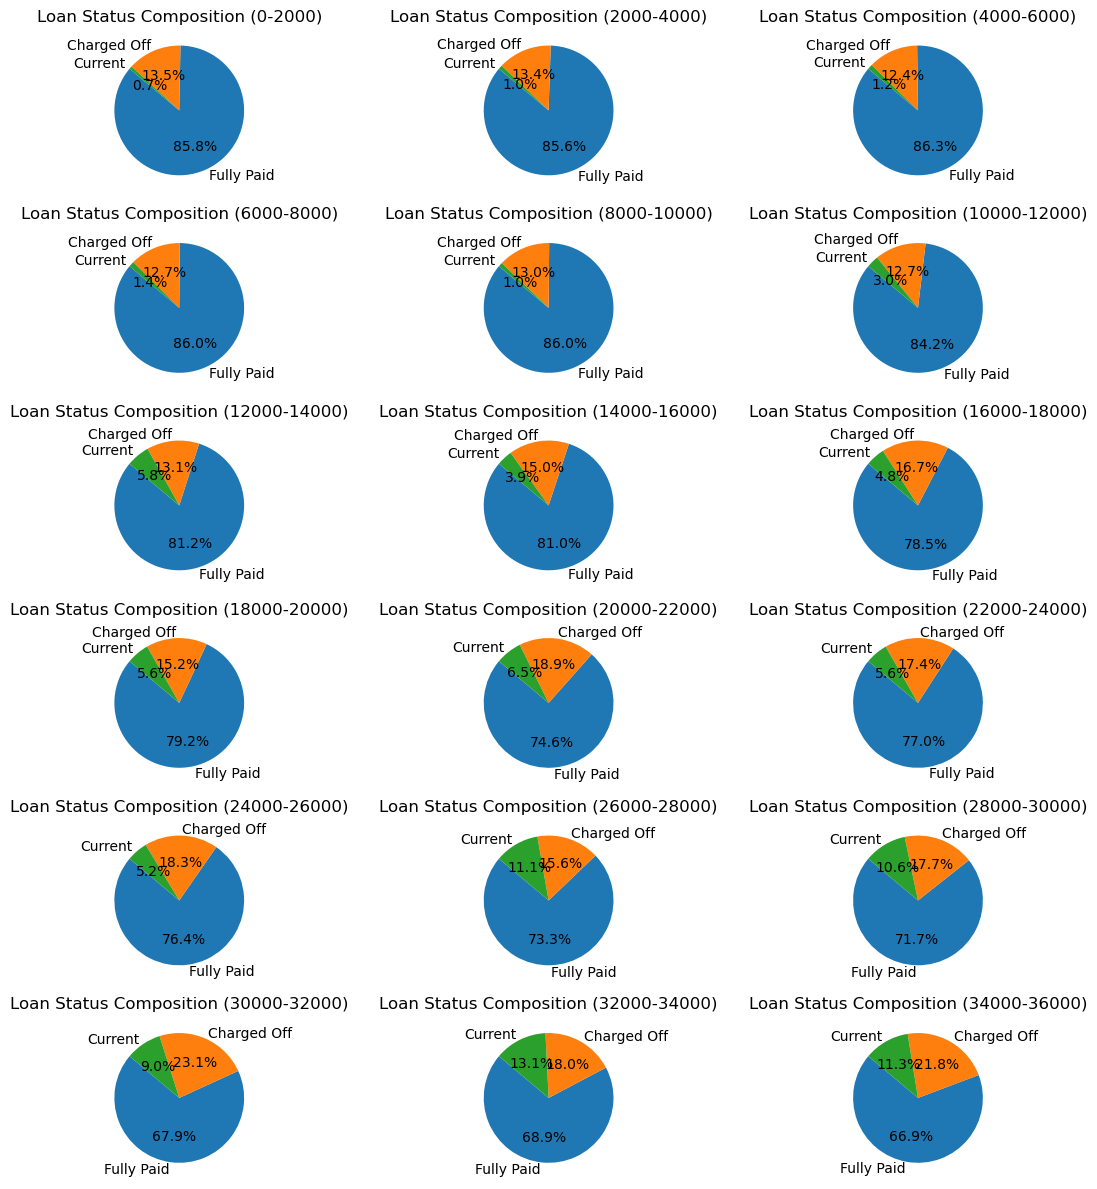

In [32]:
bin_width = 2000

# Create bins for 'loan_amnt' column
bins = range(0, int(df['loan_amnt'].max()) + bin_width, bin_width)

# Group the data by 'loan_amnt' using the defined bins
grouped = df.groupby(pd.cut(df['loan_amnt'], bins=bins))

# Calculate the number of bins
num_bins = len(grouped)

# Calculate the number of rows and columns for the grid
num_rows = (num_bins - 1) // 3 + 1
num_cols = min(num_bins, 3)

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten the axes array for easier indexing
axes = axes.ravel()

# Iterate through each bin and create a pie chart for 'loan_status' composition
for i, (group_name, group_data) in enumerate(grouped):
    # Calculate the composition of 'loan_status' within the current bin
    status_composition = group_data['loan_status'].value_counts(normalize=True)
    
    # Create a pie chart
    axes[i].pie(status_composition, labels=status_composition.index, autopct='%1.1f%%', startangle=140)
    
    # Set title
    axes[i].set_title(f'Loan Status Composition ({group_name.left}-{group_name.right})')

# Remove any remaining empty subplots
for i in range(num_bins, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust spacing between subplots
plt.tight_layout()

# Display the grid of pie charts
plt.show()

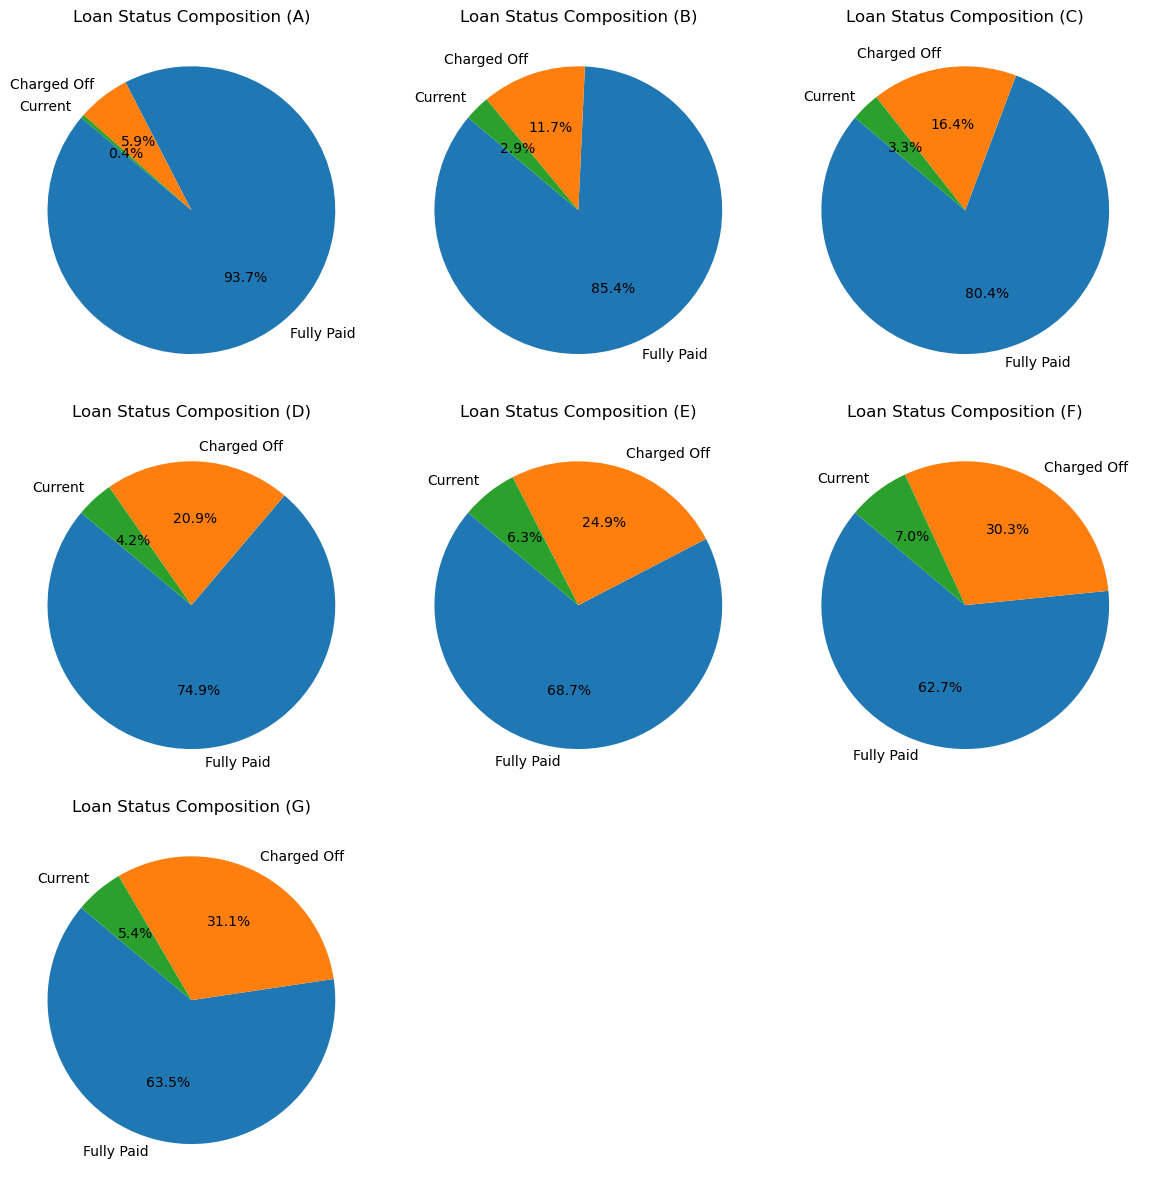

In [33]:
grouped = df.groupby('grade')

# Calculate the number of bins
num_bins = len(grouped)

# Calculate the number of rows and columns for the grid
num_rows = (num_bins - 1) // 3 + 1
num_cols = min(num_bins, 3)

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten the axes array for easier indexing
axes = axes.ravel()

# Iterate through each bin and create a pie chart for 'loan_status' composition
for i, (group_name, group_data) in enumerate(grouped):
    # Calculate the composition of 'loan_status' within the current bin
    status_composition = group_data['loan_status'].value_counts(normalize=True)
    
    # Create a pie chart
    axes[i].pie(status_composition, labels=status_composition.index, autopct='%1.1f%%', startangle=140)
    
    # Set title
    axes[i].set_title(f'Loan Status Composition ({group_name})')

# Remove any remaining empty subplots
for i in range(num_bins, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust spacing between subplots
plt.tight_layout()

# Display the grid of pie charts
plt.show()

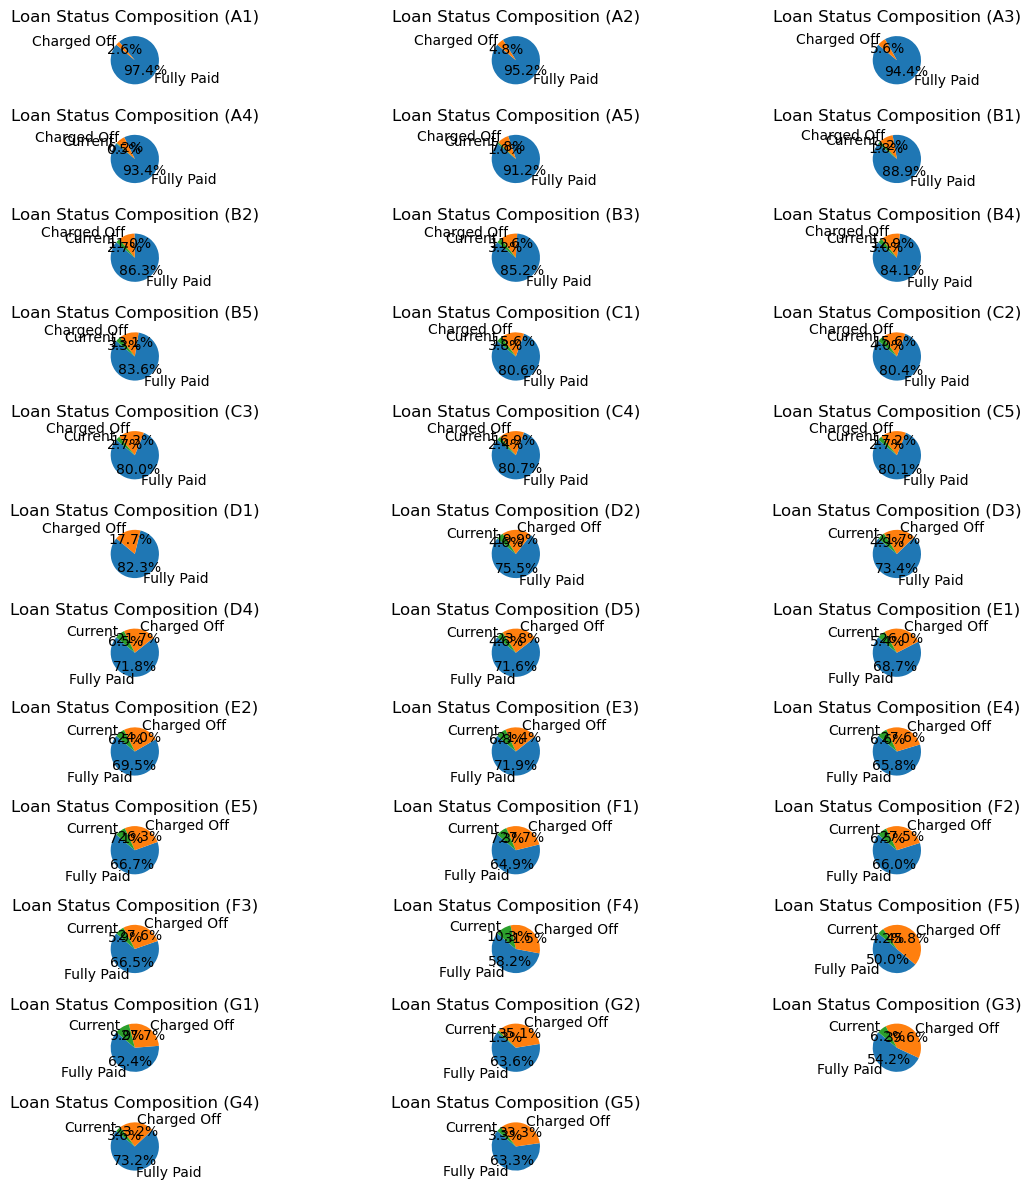

In [34]:
grouped = df.groupby('sub_grade')

# Calculate the number of bins
num_bins = len(grouped)

# Calculate the number of rows and columns for the grid
num_rows = (num_bins - 1) // 3 + 1
num_cols = min(num_bins, 3)

# Create a 3x3 grid of subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Flatten the axes array for easier indexing
axes = axes.ravel()

# Iterate through each bin and create a pie chart for 'loan_status' composition
for i, (group_name, group_data) in enumerate(grouped):
    # Calculate the composition of 'loan_status' within the current bin
    status_composition = group_data['loan_status'].value_counts(normalize=True)
    
    # Create a pie chart
    axes[i].pie(status_composition, labels=status_composition.index, autopct='%1.1f%%', startangle=140)
    
    # Set title
    axes[i].set_title(f'Loan Status Composition ({group_name})')

# Remove any remaining empty subplots
for i in range(num_bins, num_rows * num_cols):
    fig.delaxes(axes[i])

# Adjust spacing between subplots
plt.tight_layout()

# Display the grid of pie charts
plt.show()

In [35]:
df.corr()

C:\Users\chait\AppData\Local\Temp\ipykernel_12520\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term_in_months,int_rate,installment,emp_length,annual_inc,...,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,pub_rec_bankruptcies
id,1.000000,0.993650,0.141507,0.151922,0.249428,0.218046,0.079410,0.086253,0.114089,0.008626,...,0.139705,0.220689,0.111765,0.172728,-0.055189,0.033765,-0.012831,0.122145,NaN,-0.000982
member_id,0.993650,1.000000,0.140316,0.149977,0.257789,0.233744,0.075307,0.080702,0.118506,0.009284,...,0.139643,0.229186,0.111727,0.173121,-0.057862,0.031874,-0.014639,0.123415,NaN,0.000353
loan_amnt,0.141507,0.140316,1.000000,0.981516,0.940137,0.360902,0.311314,0.930120,0.154233,0.270802,...,0.887875,0.855393,0.853359,0.730311,0.044775,0.136022,0.073088,0.448752,NaN,-0.036127
funded_amnt,0.151922,0.149977,0.981516,1.000000,0.958611,0.340321,0.314504,0.956074,0.153842,0.266624,...,0.904589,0.872114,0.871777,0.738153,0.046789,0.136808,0.074891,0.453209,NaN,-0.037484
funded_amnt_inv,0.249428,0.257789,0.940137,0.958611,1.000000,0.360716,0.308857,0.905126,0.165099,0.253985,...,0.882103,0.914173,0.846750,0.731258,0.027189,0.124575,0.060849,0.442413,NaN,-0.037901
term_in_months,0.218046,0.233744,0.360902,0.340321,0.360716,1.000000,0.452690,0.101473,0.113492,0.046605,...,0.334180,0.350219,0.221829,0.530563,0.010986,0.101123,0.031753,0.232963,NaN,0.014075
int_rate,0.079410,0.075307,0.311314,0.314504,0.308857,0.452690,1.000000,0.284399,0.006858,0.054032,...,0.311498,0.306832,0.189877,0.532552,0.092822,0.122704,0.066222,0.159228,NaN,0.083312
installment,0.086253,0.080702,0.930120,0.956074,0.905126,0.101473,0.284399,1.000000,0.124644,0.270535,...,0.858277,0.818632,0.852303,0.635187,0.056811,0.118695,0.075658,0.401707,NaN,-0.033582
emp_length,0.114089,0.118506,0.154233,0.153842,0.165099,0.113492,0.006858,0.124644,1.000000,0.111250,...,0.139256,0.149519,0.129273,0.125922,-0.016579,0.024706,0.005804,0.077300,NaN,0.061622
annual_inc,0.008626,0.009284,0.270802,0.266624,0.253985,0.046605,0.054032,0.270535,0.111250,1.000000,...,0.257541,0.246660,0.259127,0.185038,0.006271,0.022119,0.016019,0.140010,NaN,-0.016585


In [36]:
grouped = df.groupby('loan_status')

# Calculate the describe statistics for each group
group_describe = grouped['annual_inc'].describe()

# Display the describe statistics for each group
print(group_describe)

               count          mean           std     min      25%      50%  \
loan_status                                                                  
Charged Off   5543.0  62695.932354  47980.625621  4080.0  37440.0  53000.0   
Current       1140.0  75430.665105  46775.431597  9960.0  47475.0  65000.0   
Fully Paid   32915.0  69881.111367  66551.205660  4000.0  41290.0  60000.0   

                 75%        max  
loan_status                      
Charged Off  75000.0  1250000.0  
Current      90000.0   650000.0  
Fully Paid   84000.0  6000000.0  


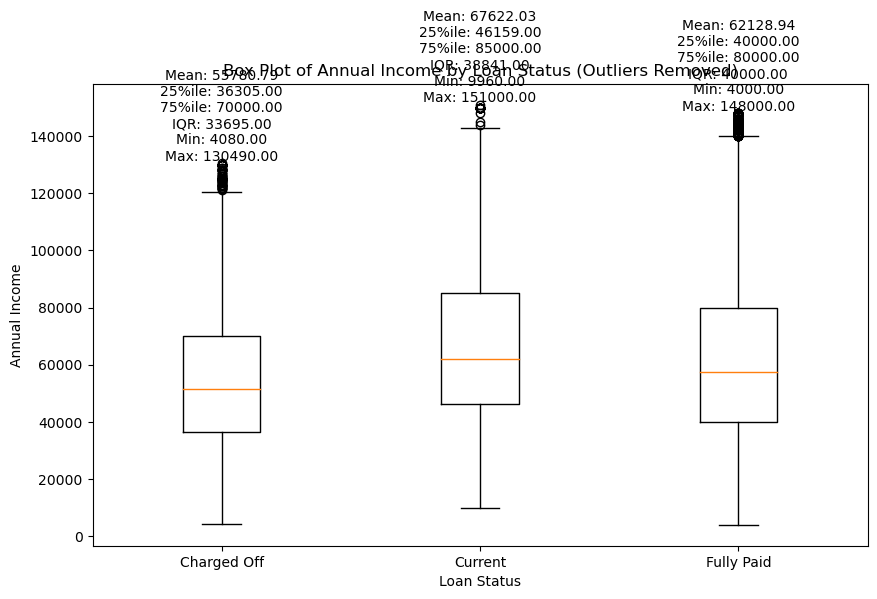

In [37]:

# Group the data by 'loan_status'
grouped = df.groupby('loan_status')

# Create a list to store the cleaned 'annual_inc' data for each group
cleaned_data_to_plot = []

# Create a list to store the statistical values for each group
statistical_values = []

# Iterate through each group, remove outliers, and append cleaned data and statistical values
for name, group in grouped:
    cleaned_data = remove_outliers(group['annual_inc'])
    cleaned_data_to_plot.append(cleaned_data)
    
    mean_value = cleaned_data.mean()
    Q1 = cleaned_data.quantile(0.25)
    Q3 = cleaned_data.quantile(0.75)
    IQR = Q3 - Q1
    min_value = cleaned_data.min()
    max_value = cleaned_data.max()
    
    stats_text = f'Mean: {mean_value:.2f}\n25%ile: {Q1:.2f}\n75%ile: {Q3:.2f}\nIQR: {IQR:.2f}\nMin: {min_value:.2f}\nMax: {max_value:.2f}'
    statistical_values.append(stats_text)


# Create a box plot for the cleaned data
plt.figure(figsize=(10, 6))
box_plot = plt.boxplot(cleaned_data_to_plot, labels=grouped.groups.keys())
plt.xlabel('Loan Status')
plt.ylabel('Annual Income')
plt.title('Box Plot of Annual Income by Loan Status (Outliers Removed)')

# Add statistical values as text
for i, stats in enumerate(statistical_values):
    plt.text(i + 1, max(cleaned_data_to_plot[i]) + 1000, stats, horizontalalignment='center')

plt.show()

In [38]:
grouped = df.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)

# Calculate the total count of each 'purpose' group
total_counts = grouped.sum(axis=1)

# Calculate the percentage distribution for each 'purpose' group
percentage_distribution = (grouped.T / total_counts * 100).T

# Print the percentage distribution for each 'purpose' group
for purpose, distribution in percentage_distribution.iterrows():
    print(f'Purpose: {purpose}')
    print(distribution)
    print()

Purpose: car
loan_status
Charged Off    10.277957
Current         3.232062
Fully Paid     86.489981
Name: car, dtype: float64

Purpose: credit_card
loan_status
Charged Off    10.497561
Current         2.009756
Fully Paid     87.492683
Name: credit_card, dtype: float64

Purpose: debt_consolidation
loan_status
Charged Off    14.698135
Current         3.150368
Fully Paid     82.151497
Name: debt_consolidation, dtype: float64

Purpose: educational
loan_status
Charged Off    16.61442
Current         0.00000
Fully Paid     83.38558
Name: educational, dtype: float64

Purpose: home_improvement
loan_status
Charged Off    11.489218
Current         3.402965
Fully Paid     85.107817
Name: home_improvement, dtype: float64

Purpose: house
loan_status
Charged Off    15.039578
Current         3.693931
Fully Paid     81.266491
Name: house, dtype: float64

Purpose: major_purchase
loan_status
Charged Off     9.926471
Current         1.700368
Fully Paid     88.373162
Name: major_purchase, dtype: float64



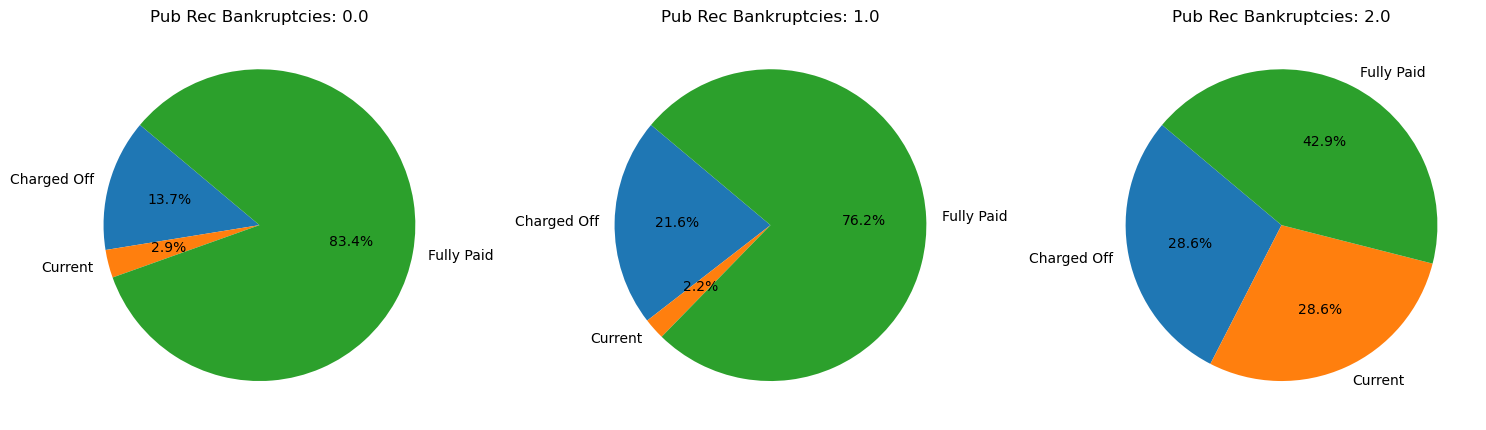

In [39]:
grouped = df.groupby(['pub_rec_bankruptcies', 'loan_status']).size().unstack(fill_value=0)

# Create a figure with three subplots in one row
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Loop through each 'pub_rec_bankruptcies' group and create a pie chart
for i, (pub_rec, distribution) in enumerate(grouped.iterrows()):
    ax = axes[i]
    
    # Create a pie chart for the distribution of 'loan_status'
    ax.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=140)
    
    # Set title
    ax.set_title(f'Pub Rec Bankruptcies: {pub_rec}')
    
# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

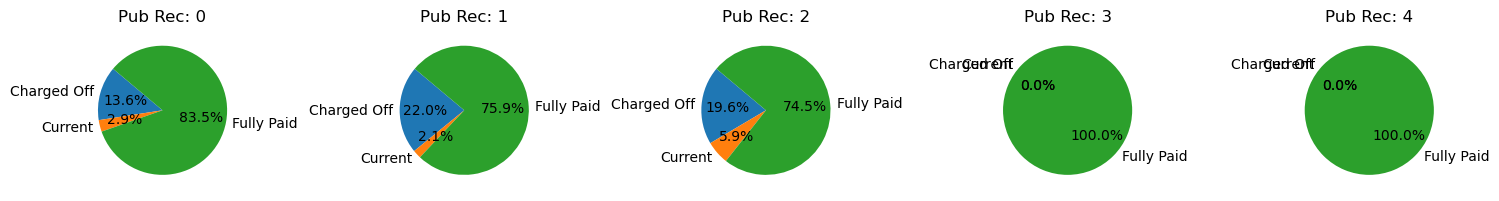

In [40]:
grouped = df.groupby(['pub_rec', 'loan_status']).size().unstack(fill_value=0)

# Create a figure with three subplots in one row
fig, axes = plt.subplots(1, 5, figsize=(15, 5))

# Loop through each 'pub_rec_bankruptcies' group and create a pie chart
for i, (pub_rec, distribution) in enumerate(grouped.iterrows()):
    ax = axes[i]
    
    # Create a pie chart for the distribution of 'loan_status'
    ax.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=140)
    
    # Set title
    ax.set_title(f'Pub Rec: {pub_rec}')
    
# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

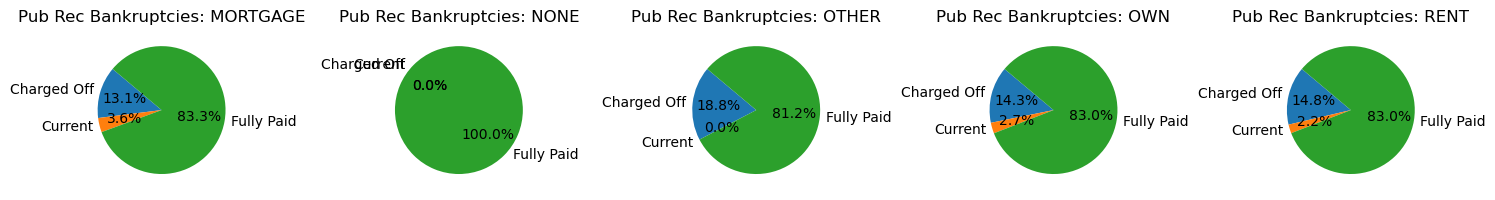

In [41]:
grouped = df.groupby(['home_ownership','loan_status']).size().unstack(fill_value=0)

# Create a figure with three subplots in one row
fig, axes = plt.subplots(1,5, figsize=(15, 5))

# Loop through each 'pub_rec_bankruptcies' group and create a pie chart
for i, (pub_rec, distribution) in enumerate(grouped.iterrows()):
    ax = axes[i]
    
    # Create a pie chart for the distribution of 'loan_status'
    ax.pie(distribution, labels=distribution.index, autopct='%1.1f%%', startangle=140)
    
    # Set title
    ax.set_title(f'Pub Rec Bankruptcies: {pub_rec}')
    
# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()

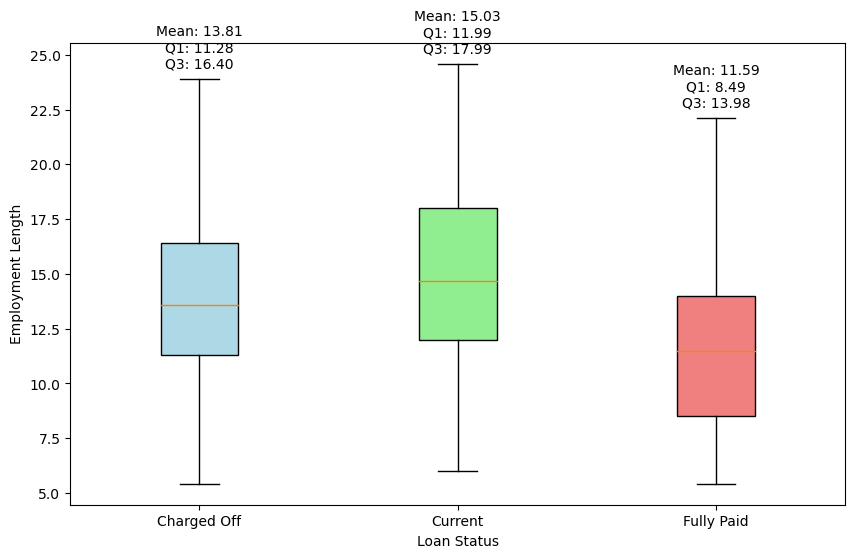

In [55]:
# Group the data by 'loan_status'
grouped = df.groupby('loan_status')

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Create a list to store cleaned data for each 'loan_status' group
cleaned_data_to_plot = []

# Create a list to store statistical values for each group
statistical_values = []

# Iterate through each 'loan_status' group, remove outliers, and store cleaned data and statistics
for _, group in grouped:
    cleaned_data = remove_outliers(group['int_rate'])
    cleaned_data_to_plot.append(cleaned_data)
    
    mean_value = cleaned_data.mean()
    Q1 = cleaned_data.quantile(0.25)
    Q3 = cleaned_data.quantile(0.75)
    
    stats_text = f'Mean: {mean_value:.2f}\nQ1: {Q1:.2f}\nQ3: {Q3:.2f}'
    statistical_values.append(stats_text)

# Create a box plot for the cleaned data on the same plot
box_plot = ax.boxplot(cleaned_data_to_plot, vert=True, patch_artist=True, labels=grouped.groups.keys())

# Add labels and title
ax.set_xlabel('Loan Status')
ax.set_ylabel('Employment Length')

# Set colors for the box plots
colors = ['lightblue', 'lightgreen', 'lightcoral']
for patch, color in zip(box_plot['boxes'], colors):
    patch.set_facecolor(color)

# Add statistical values as text to the plot
for i, stats in enumerate(statistical_values):
    ax.text(i + 1, max(cleaned_data_to_plot[i]) + 0.5, stats, horizontalalignment='center', fontsize=10)

# Display the plot
plt.show()

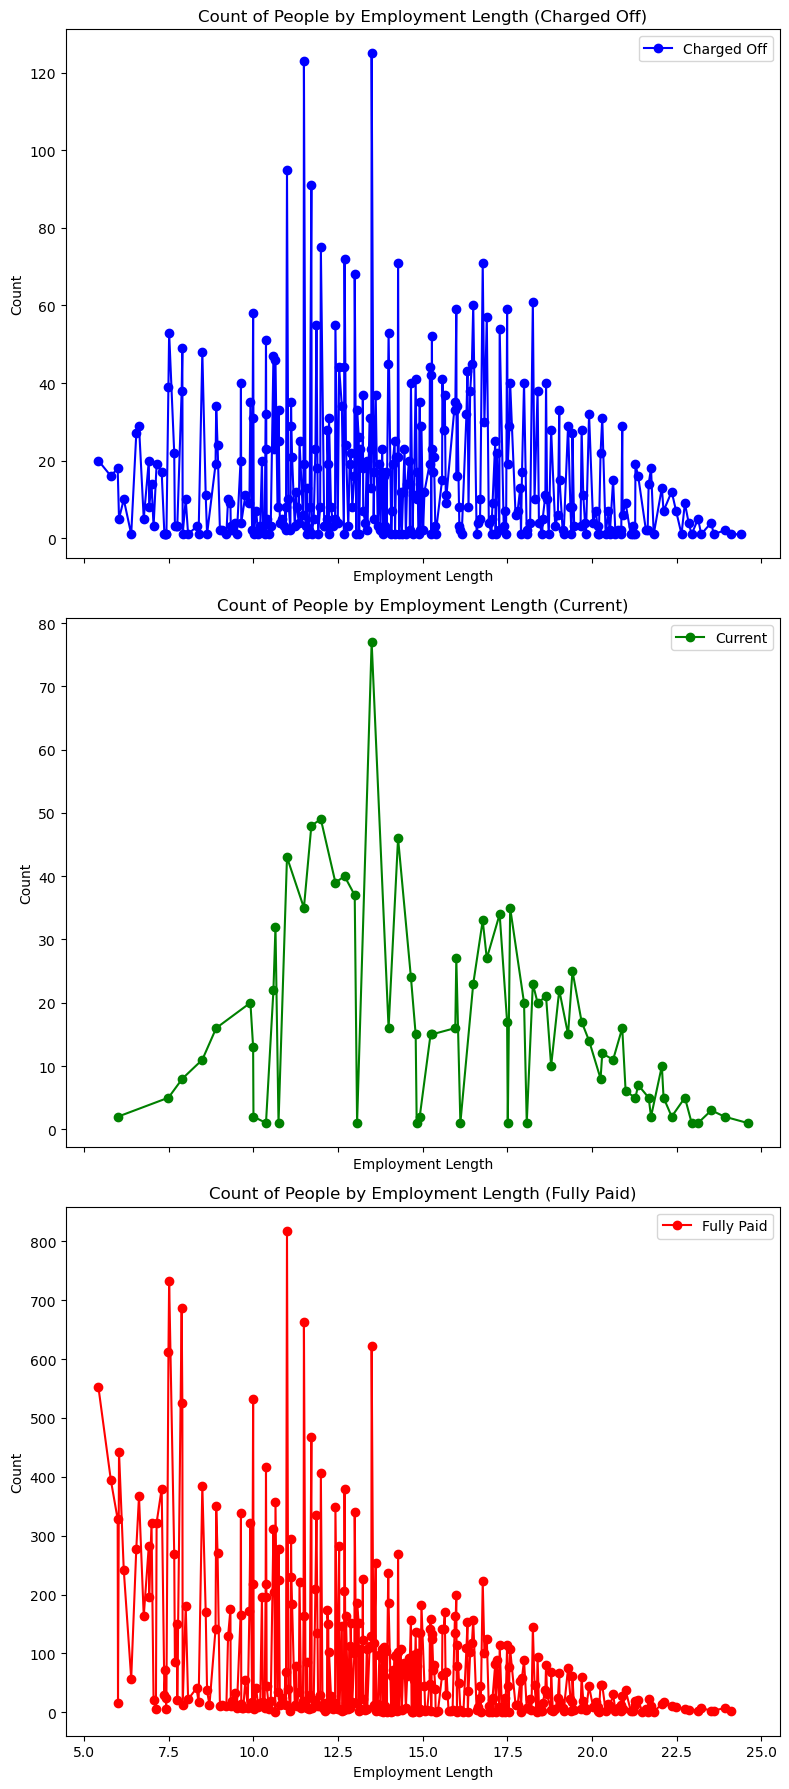

In [46]:
grouped = df.groupby('loan_status')

# Create a figure with subplots arranged vertically
fig, axes = plt.subplots(len(grouped), 1, figsize=(8, 6 * len(grouped)), sharex=True)

# Define colors for each group
colors = ['b', 'g', 'r']

# Iterate through each 'loan_status' group
for i, (loan_status, group) in enumerate(grouped):
    ax = axes[i]
    
    # Count the number of people with each 'emp_length' value
    emp_length_counts = group['int_rate'].value_counts().sort_index()
    
    # Plot the line graph for the current group
    ax.plot(emp_length_counts.index, emp_length_counts.values, marker='o', color=colors[i], label=loan_status)
    
    # Set labels and title for the subplot
    ax.set_xlabel('Employment Length')
    ax.set_ylabel('Count')
    ax.set_title(f'Count of People by Employment Length ({loan_status})')
    
    # Show legend
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()